In [1]:
from sklearn.manifold import TSNE
import scipy.io.wavfile as wav
import numpy as np
import speechpy as sp
import os
import matplotlib.pyplot as plt

In [16]:
path = "/home/jugs/Downloads/PresidentAudio/"
result = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.wav']
# audio = np.random.randint((6,512,13))   # Create MNIST Like stack of image
stacked = np.empty((len(result),512*13))  # Create MNIST Like stack of image
labels = []

In [17]:
for idx, file in enumerate(result):
    labels.append(file.split('/')[5])
    fs, signal = wav.read(file)
    signal_preemphasized = sp.processing.preemphasis(signal, cof=0.98)
    frames = sp.processing.stack_frames(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
                                              filter=lambda x: np.ones((x,)),
                                              zero_padding=True)

    power_spectrum = sp.processing.power_spectrum(frames)
    # print('power spectrum shape=', power_spectrum.shape)

    mfcc = sp.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
                                 num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)

    mfcc_cmvn = sp.processing.cmvnw(mfcc, win_size=301, variance_normalization=True)
    # print('mfcc(mean + variance normalized) feature shape=', mfcc_cmvn.shape)

    reshape_mfcc = np.array(mfcc).reshape(mfcc.shape[0]*mfcc.shape[1])
    # print(reshape_mfcc)
    stacked[idx] = np.resize(reshape_mfcc,(512*13))


In [18]:
def plot_embedding(X, title="tsne dim reduction"):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    # plt.figure()
    ax = plt.subplot(111)

    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], labels[i],
                 color= 'red',
                 fontdict={'weight': 'bold', 'size': 6})
    if title is not None:
        plt.title(title)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.020s...
[t-SNE] Computed neighbors for 210 samples in 0.429s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 57.620566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.395508
[t-SNE] Error after 1000 iterations: 0.712549
plot img


/home/jugs/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


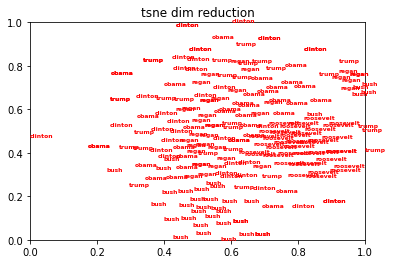

In [19]:
embedder = TSNE(n_components=2, verbose=1, init='pca', random_state=0)
x_tsne = embedder.fit_transform(stacked)
print("plot img")
plot_embedding(x_tsne)
plt.savefig("speechpy.png",bbox_inches='tight')
plt.show()
